In [20]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
  

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [25]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aben_\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
stop = set(stopwords.words('english'))
for w in ['wa','ha','us','place','translated','great','people','church','aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']:
    STOPWORDS.add(w)

In [27]:
def read_reviews(folder,fname):
    test=pd.read_csv(folder + fname )
    return test['review'].str.cat(sep=' ').replace('\n', ' ')

In [28]:
def lemmatize(string,on_off):
    if on_off == 0:
        return string
    if on_off == 1:
        lemmatizer = WordNetLemmatizer()
        lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(string)])
        return lemmatized_output

In [29]:
def read_all(denom,lem):
    df = pd.DataFrame(columns =['church','reviews','denomination'])
 
    for key, value in denom.items():
        mypath='C:/Users/aben_/Documents/ISYE 6740/Homework/project/' + key + '/'
        files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
        for file in files:
            review_text = lemmatize(read_reviews(mypath,file),lem)
            row_to_append = pd.DataFrame([{'church':file.split('.')[0], 'reviews':review_text,"denomination": value}])
            df = pd.concat([df,row_to_append])
    return df

In [30]:
def get_bow(df):
    #word cloud by word count (DTM)
    cv=CountVectorizer(stop_words=STOPWORDS, ngram_range=(1, 1))
    bag_of_words = cv.fit_transform(all_text['reviews'])
    bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = cv.get_feature_names_out ())
    return bag_of_words

In [31]:
denominations = {'pcusa': 1}

In [32]:
all_text=read_all(denominations,0)
all_text

,church,reviews,denomination
0,pcusa0,I went to this church to the food bank a great...,1
0,pcusa1,Everything a faith family should be - upliftin...,1
0,pcusa10,The congregation is very welcoming. The pastor...,1
0,pcusa11,Absolutely beautiful Church ❤️ built in the 18...,1
0,pcusa12,Amazing. The youth group is very nice and ever...,1
...,...,...,...
0,pcusa95,Awesome house of fellowship and worship! Have ...,1
0,pcusa96,I go to church here so it’s pretty cool My onl...,1
0,pcusa97,"My first time worshipping here, nice reception...",1
0,pcusa98,The people of this church are friendly and wel...,1


In [33]:
bow=get_bow(all_text)
bow

,00,00am,10,100,1000,10am,11,1100am,11am,12,...,zbout,zones,zoom,但是哥特式表现的有点矛盾,古老而漂亮的教堂,坐东朝西好像不是,感谢赞美主,据说这是美国夏洛特最美的哥特式教堂,管风琴伴奏下的赞美诗圣歌令人回肠荡气,阿们
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
import pandas
from sklearn.decomposition import PCA
import numpy
import matplotlib.pyplot as plot
from sklearn.decomposition import TruncatedSVD 
from sklearn.feature_extraction.text import TfidfVectorizer


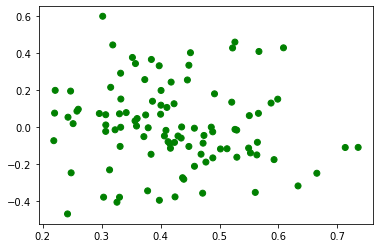

In [35]:
v = TfidfVectorizer(max_features=50,ngram_range=(1,1),use_idf=False,sublinear_tf=False, max_df=.3,stop_words=STOPWORDS)
x = v.fit_transform(all_text['reviews'])
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
principalComponents = svd.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

principalDf_concat = pd.concat([all_text.reset_index(),principalDf.reset_index()], axis=1)
colors = {0:'red', 1:'green', 2:'blue'}


fig = plt.figure()
ax = fig.add_subplot(111)

x = principalDf_concat.iloc[:,5]
y = principalDf_concat.iloc[:,6]

ax.scatter(x, y,c = principalDf_concat['denomination'].map(colors))
plt.show()


In [36]:
feature_names = v.get_feature_names_out()
best_features = [feature_names[i] for i in svd.components_[0].argsort()[::-1]]
best_features

['everyone',
 'welcome',
 'thank',
 'kind',
 'really',
 'well',
 'visit',
 'come',
 'time',
 'will',
 'help',
 'children',
 'members',
 'staff',
 'first',
 'every',
 'services',
 'life',
 'loving',
 'caring',
 'feel',
 'school',
 'lot',
 'much',
 'group',
 'experience',
 'program',
 'awesome',
 'member',
 'attend',
 'sermons',
 'choir',
 'thanks',
 'went',
 'excellent',
 'work',
 'christ',
 'new',
 'looking',
 'jesus',
 'small',
 'day',
 'food',
 'see',
 'even',
 'churches',
 'old',
 'building',
 'architecture',
 'homeless']

In [37]:
X_tfidf = v.fit_transform(all_text['reviews']).toarray()
vocab = v.vocabulary_
reverse_vocab = {v:k for k,v in vocab.items()}

feature_names = v.get_feature_names_out()
df_tfidf = pd.DataFrame(X_tfidf, columns = feature_names)

idx = X_tfidf.argsort(axis=1)

tfidf_max25 = idx[:,-25:]

df_tfidf['top25'] = [[reverse_vocab.get(item) for item in row] for row in tfidf_max25]

df_tfidf['top25'] 

0     [even, every, everyone, building, excellent, a...
1     [choir, awesome, churches, jesus, day, even, e...
2     [attend, awesome, building, caring, children, ...
3     [attend, awesome, building, caring, children, ...
4     [caring, children, choir, christ, come, church...
                            ...                        
95    [building, caring, children, choir, christ, ch...
96    [building, caring, choir, christ, churches, co...
97    [caring, children, choir, churches, help, even...
98    [jesus, attend, awesome, building, caring, chi...
99    [caring, children, choir, christ, churches, co...
Name: top25, Length: 100, dtype: object

In [39]:
global_top25_idx = X_tfidf.max(axis=0).argsort()[-25:]
np.asarray(feature_names)[global_top25_idx]

array(['feel', 'christ', 'program', 'old', 'life', 'choir', 'well',
       'welcome', 'thank', 'first', 'sermons', 'homeless', 'kind',
       'staff', 'come', 'school', 'members', 'caring', 'children',
       'architecture', 'group', 'excellent', 'food', 'help', 'everyone'],
      dtype=object)